In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 

## Data Preprocess

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=["id","date"] , inplace=True)
df_seg = df.drop(columns=["price"] )

In [9]:

features= df.loc[:, ~(df.columns.unique().isin(["price"]))]
target = df.loc[:,["price"]]

### Segmentation

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_seg)

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

max_value=30
wcss=[]
shil_score=[]

for k in range(2,max_value):
    kmeans = KMeans(n_clusters=k , init='k-means++' ,random_state=42)
    model = kmeans.fit(df_scaled)
    model_predict = model.predict(df_scaled)
    
    wcss.append(model.inertia_)
    shil_score.append(silhouette_score(df_scaled, model_predict))

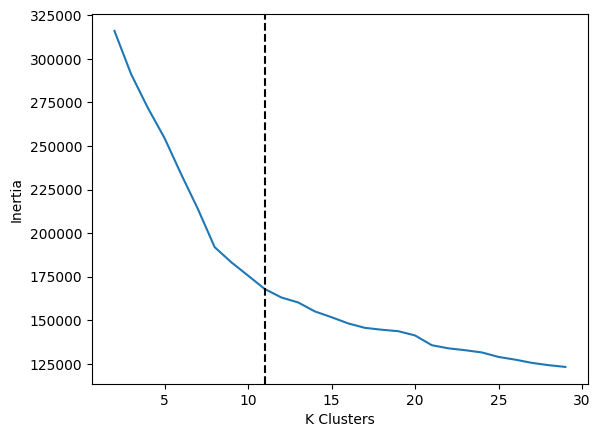

In [12]:
import matplotlib.pyplot as plt

plt.ylabel("Inertia")
plt.xlabel("K Clusters")
plt.plot(range(2,max_value) , wcss)
plt.axvline(11,linestyle='--',color='k')



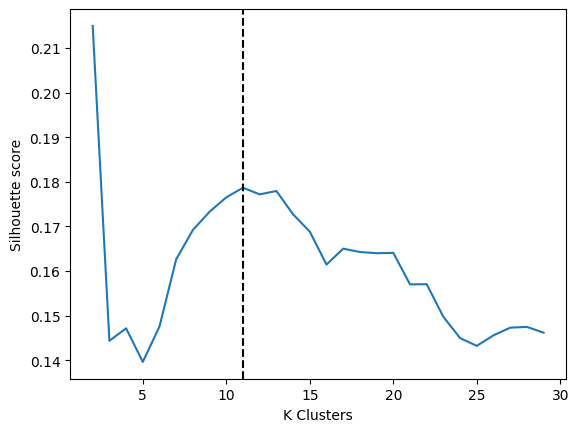

In [13]:
plt.ylabel("Silhouette score")
plt.xlabel("K Clusters")
plt.plot(range(2,max_value) , shil_score)
plt.axvline(11,linestyle='--',color='k')


## K=11

In [14]:
kmeans = KMeans(n_clusters=11 , init='k-means++' ,random_state=42)
model = kmeans.fit_predict(df_scaled)
df["label"] = model

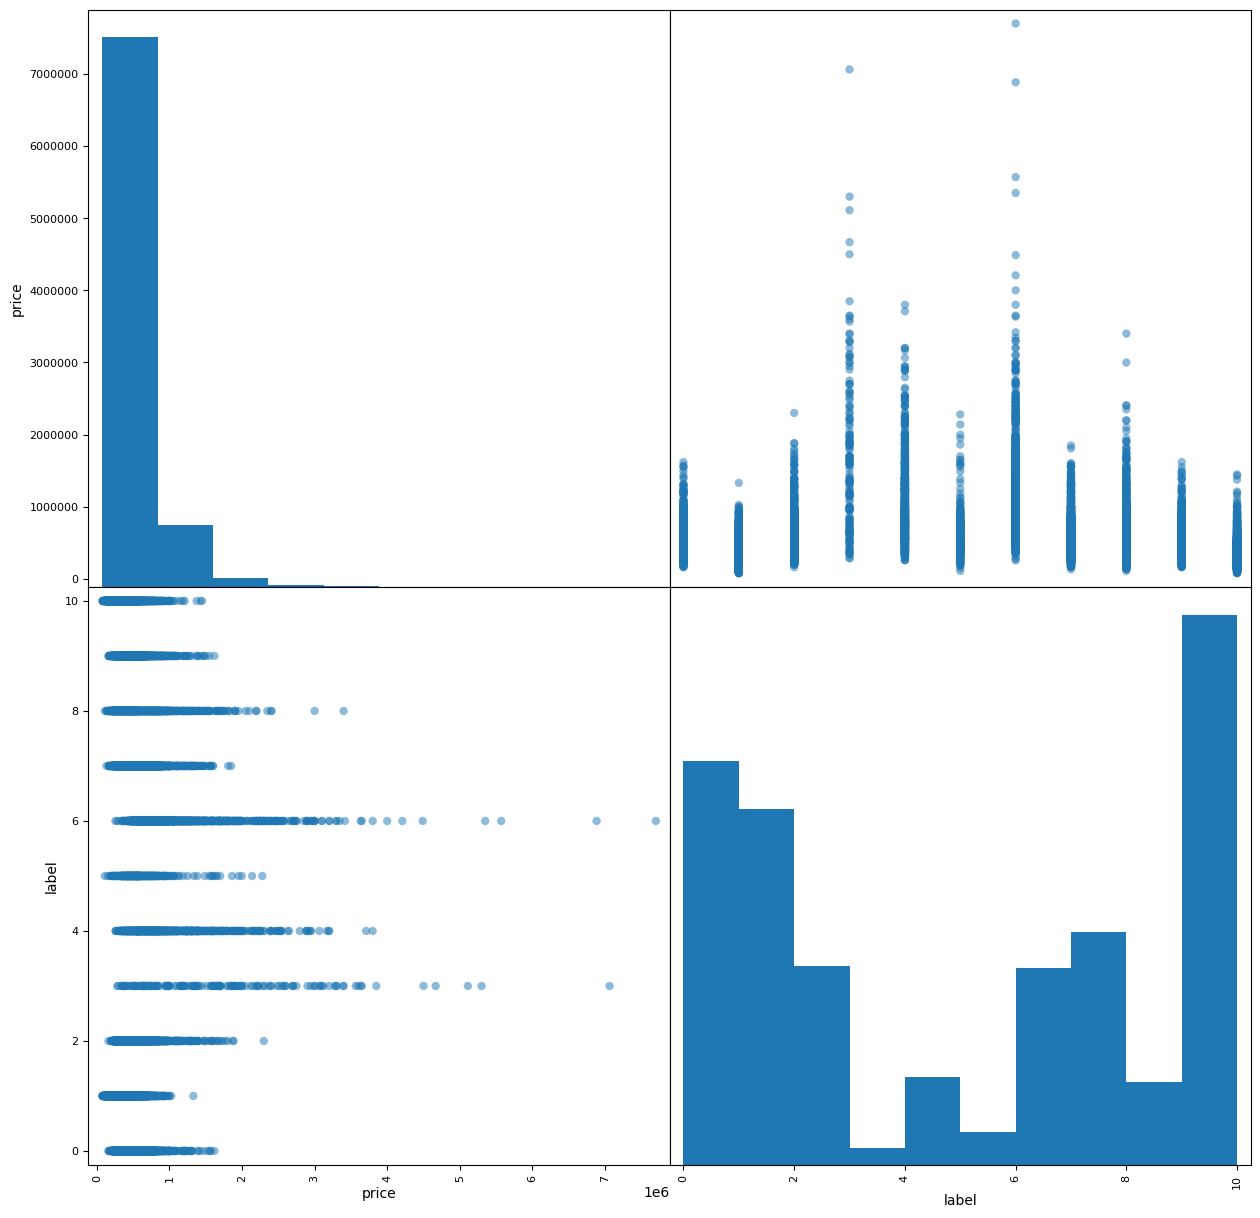

In [15]:
from pandas.plotting import scatter_matrix 

grr = scatter_matrix(df[["price","label"]], figsize=(15, 15), marker='o')

In [16]:
df[["price","label"]].groupby(by="label").describe()

price                                                             \
        count          mean           std       min       25%        50%   
label                                                                      
0      4046.0  4.748181e+05  1.744619e+05  160000.0  339950.0   441250.0   
1      3562.0  3.752846e+05  1.493184e+05   78000.0  260700.0   354975.0   
2      1990.0  5.389379e+05  2.337583e+05  160000.0  381500.0   495100.0   
3       163.0  1.661876e+06  1.120372e+06  285000.0  760000.0  1400000.0   
4       884.0  9.888244e+05  5.346186e+05  259900.0  613500.0   847000.0   
5       327.0  6.255348e+05  3.190573e+05  110000.0  429000.0   559000.0   
6      1970.0  1.013349e+06  5.464420e+05  257000.0  725000.0   853500.0   
7      2329.0  5.733728e+05  2.294559e+05  133000.0  405000.0   546000.0   
8       828.0  6.702470e+05  4.024936e+05  110000.0  396785.0   569500.0   
9      1775.0  4.863473e+05  1.906879e+05  160797.0  358000.0   448175.0   
10     3739.0  3.324661e+05  1.464548e+05   75000.0  234150.0   291000.0   

                             
             75%        max  
label                        
0       575000.0  1620000.0  
1       460000.0  1330000.0  
2       625000.0  2300000.0  
3      2215000.0  7062500.0  
4      1234935.0  3800000.0  
5       747500.0  2280000.0  
6      1135000.0  7700000.0  
7       690000.0  1850000.0  
8       850000.0  3400000.0  
9       570000.0  1620000.0  
10      400000.0  1450000.0

### K=13

In [17]:
kmeans = KMeans(n_clusters=13 , init='k-means++' ,random_state=42)
model = kmeans.fit_predict(df_scaled)
df["label"] = model

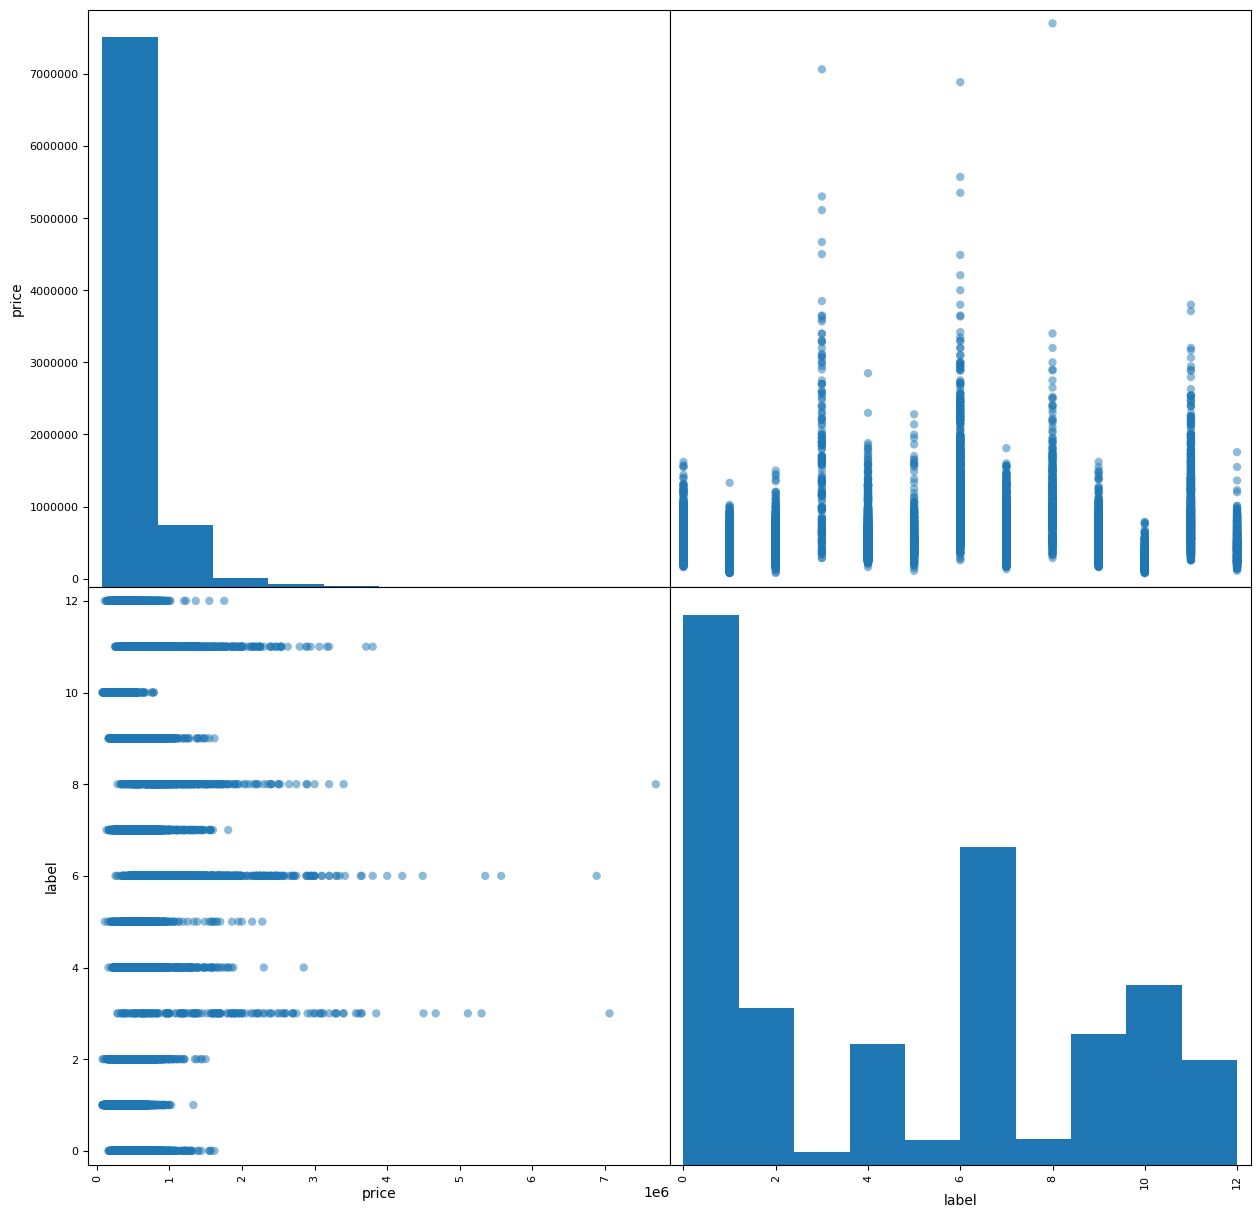

In [18]:
from pandas.plotting import scatter_matrix 

grr = scatter_matrix(df[["price","label"]], figsize=(15, 15), marker='o')

In [19]:
df[["price","label"]].groupby(by="label").describe()

price                                                             \
        count          mean           std       min       25%        50%   
label                                                                      
0      3861.0  4.805570e+05  1.760297e+05  160000.0  341500.0   449500.0   
1      3471.0  3.727860e+05  1.492278e+05   78000.0  259950.0   350000.0   
2      2087.0  4.551124e+05  1.552867e+05   80000.0  354000.0   430000.0   
3       163.0  1.661876e+06  1.120372e+06  285000.0  760000.0  1400000.0   
4      1602.0  5.761242e+05  2.629374e+05  160000.0  400000.0   528000.0   
5       322.0  6.288801e+05  3.201700e+05  110000.0  430000.0   560000.0   
6      1903.0  1.020531e+06  5.268955e+05  257000.0  730000.0   861990.0   
7      2335.0  5.679269e+05  2.234549e+05  133000.0  404250.0   540000.0   
8       341.0  1.091508e+06  6.409818e+05  285000.0  740000.0   930000.0   
9      1735.0  4.875435e+05  1.896629e+05  160797.0  358995.0   450000.0   
10     2398.0  2.596524e+05  7.405100e+04   75000.0  215000.0   250000.0   
11      876.0  9.352092e+05  5.040441e+05  250000.0  587875.0   810000.0   
12      519.0  4.802246e+05  2.166126e+05  110000.0  312500.0   447500.0   

                             
             75%        max  
label                        
0       585000.0  1620000.0  
1       457250.0  1330000.0  
2       520000.0  1500000.0  
3      2215000.0  7062500.0  
4       668125.0  2850000.0  
5       750000.0  2280000.0  
6      1150000.0  6885000.0  
7       685950.0  1810000.0  
8      1307000.0  7700000.0  
9       575000.0  1620000.0  
10      289000.0   785000.0  
11     1150000.0  3800000.0  
12      601250.0  1755000.0

## ANN segmentation (segmentation with K=11)

### ANN for LABELS != 3 or 6

In [20]:
kmeans = KMeans(n_clusters=11 , init='k-means++' ,random_state=42)
model = kmeans.fit_predict(df_scaled)
df["label"] = model

In [21]:

df2 = df[(df.label != 6) & (df.label != 3)].drop(columns=["label"])

In [22]:
features= df2.loc[:, ~(df2.columns.unique().isin(["price"]))]
target = df2.loc[:,["price"]]

In [23]:
#Scaling the data

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test =train_test_split(features,target, test_size=0.2 , random_state=42)

scaler=StandardScaler()

x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)


In [24]:
import keras
from keras_tuner.tuners import RandomSearch

In [25]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    
    for i in range(hp.Int("num_layers", 1, 20)):
        model.add(
            keras.layers.Dense(
                
                units=hp.Int(f"units_{i}", min_value=18, max_value=450, step=9),
                activation=hp.Choice("activation", ["relu"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(keras.layers.Dropout(rate=0.25))
    model.add(keras.layers.Dense(1, activation="linear"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mean_absolute_error",
        metrics=["mean_absolute_error"],
    )
    return model

In [26]:
tuner = RandomSearch(
    hypermodel=build_model,
    objective="val_mean_absolute_error",
    max_trials=3,
    executions_per_trial=10,
    overwrite=True,
    directory="tensor1",
    project_name="Segmentation",
)

In [27]:
stop_early = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [28]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 18, 'max_value': 450, 'step': 9, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [29]:
tuner.search(x_train,y_train ,epochs=200,validation_data=(x_test,y_test) , callbacks=[stop_early])

Trial 3 Complete [00h 08m 05s]
val_mean_absolute_error: 72001.53671875

Best val_mean_absolute_error So Far: 66988.321875
Total elapsed time: 00h 27m 44s


In [30]:
tuner.results_summary()

Results summary
Results in tensor1\Segmentation
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 0 summary
Hyperparameters:
num_layers: 11
units_0: 270
activation: relu
dropout: False
lr: 0.0003259959390162013
units_1: 18
units_2: 18
units_3: 18
units_4: 18
units_5: 18
units_6: 18
units_7: 18
units_8: 18
units_9: 18
units_10: 18
Score: 66988.321875

Trial 1 summary
Hyperparameters:
num_layers: 13
units_0: 315
activation: relu
dropout: True
lr: 0.0019865685507933165
units_1: 171
units_2: 162
units_3: 216
units_4: 171
units_5: 225
units_6: 99
units_7: 324
units_8: 126
units_9: 36
units_10: 171
units_11: 18
units_12: 18
Score: 71245.015234375

Trial 2 summary
Hyperparameters:
num_layers: 15
units_0: 432
activation: relu
dropout: True
lr: 0.00043521287221261765
units_1: 324
units_2: 252
units_3: 36
units_4: 243
units_5: 243
units_6: 144
units_7: 243
units_8: 45
units_9: 288
units_10: 252
units_11: 270
units_12: 81
units_13: 18
units_14: 18
Score: 720

In [31]:
#Best model
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.summary()

C:\Users\PC1\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (32, 18)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 270)              │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 18)               │         4,878 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 18)               │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 18)               │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 18)               │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 18)               │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 18)               │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 18)               │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (32, 18)               │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (32, 18)               │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (32, 18)               │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (32, 1)                │            19 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,105 (51.19 KB)

 Trainable params: 13,105 (51.19 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
#Build and train the model with the best hyperparameters

best_hps = tuner.get_best_hyperparameters(5)

model = build_model(best_hps[0])

model.fit(x=x_train, y=y_train, validation_split=0.1 ,epochs=500)

Epoch 1/500
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 445137.1250 - mean_absolute_error: 445137.1250 - val_loss: 143274.2656 - val_mean_absolute_error: 143274.2656
Epoch 2/500
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 126002.4688 - mean_absolute_error: 126002.4688 - val_loss: 105297.5781 - val_mean_absolute_error: 105297.5781
Epoch 3/500
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 101170.7031 - mean_absolute_error: 101170.7031 - val_loss: 99564.6328 - val_mean_absolute_error: 99564.6328
Epoch 4/500
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 95590.9062 - mean_absolute_error: 95590.9062 - val_loss: 97146.6406 - val_mean_absolute_error: 97146.6406
Epoch 5/500
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 92043.3594 - mean_absolute_error: 92043.3594 - val_loss: 95703.2266 - val_mean_absolute_error: 95703.2266
Epoch 6/500
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 93214.4453 - mean_absolute_error: 93214.4453 - val_loss: 95319.4219 - val_mean_absolute_error:

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Axes: title={'center': 'Predicted value vs target value'}, xlabel='Predicted value', ylabel='target value'>

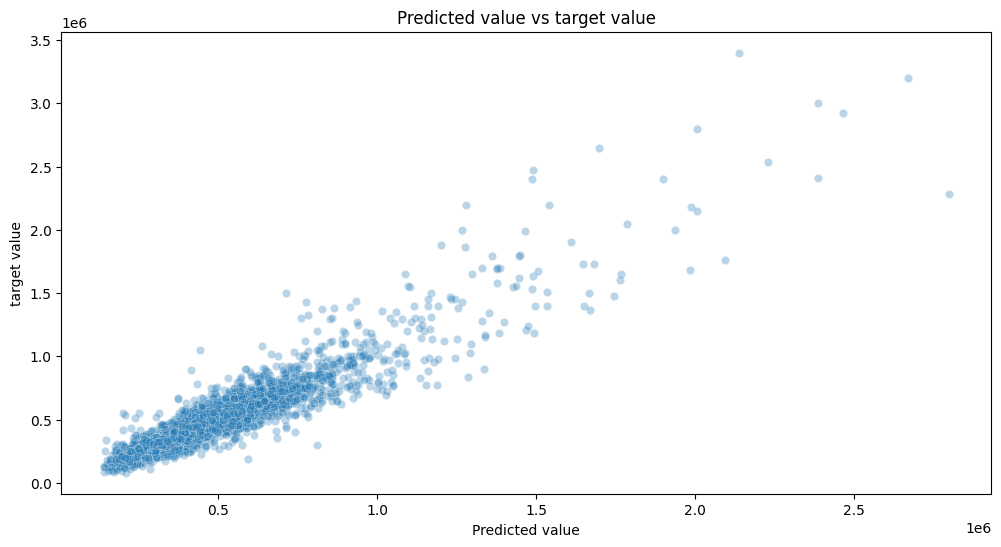

In [33]:
import matplotlib.pyplot as plt 
import seaborn as sns

predict = [i[0] for i in  model.predict(x_test)]

data = pd.DataFrame({"predict": predict , "true_value" : y_test.price})

plt.figure(figsize=(12,6))
plt.title("Predicted value vs target value")
plt.ylabel("target value")
plt.xlabel("Predicted value")
sns.scatterplot(data = data , x="predict", y= "true_value", alpha=0.30)


In [34]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error , root_mean_squared_error  

print("MAE: ", mean_absolute_error(predict , y_test))
print("MAPE: ", mean_absolute_percentage_error(predict , y_test))
print("RMSE: ", root_mean_squared_error(predict , y_test))

MAE:  61773.60449419276
MAPE:  0.1276305452895651
RMSE:  102346.97434221503


### ANN for LABELS 3 and 6


In [35]:

df3 = df[(df.label == 3) | (df.label == 6)].drop(columns=["label"])

In [36]:
features= df3.loc[:, ~(df3.columns.unique().isin(["price"]))]
target = df3.loc[:,["price"]]

In [37]:
#Scaling the data

x_train , x_test , y_train , y_test =train_test_split(features,target, test_size=0.2 , random_state=42)

scaler=StandardScaler()

x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [38]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    
    for i in range(hp.Int("num_layers", 1, 20)):
        model.add(
            keras.layers.Dense(
                
                units=hp.Int(f"units_{i}", min_value=18, max_value=450, step=9),
                activation=hp.Choice("activation", ["relu","leaky_relu"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(keras.layers.Dropout(rate=0.25))
    model.add(keras.layers.Dense(1, activation="linear"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mean_absolute_error",
        metrics=["mean_absolute_error"],
    )
    return model

In [39]:
tuner = RandomSearch(
    hypermodel=build_model,
    objective="val_mean_absolute_error",
    max_trials=3,
    executions_per_trial=10,
    overwrite=True,
    directory="tensor1",
    project_name="Segmentation2",
)

In [40]:
stop_early = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [41]:
tuner.search(x_train,y_train ,epochs=500,validation_data=(x_test,y_test) , callbacks=[stop_early])

Trial 3 Complete [00h 02m 49s]
val_mean_absolute_error: 184888.1171875

Best val_mean_absolute_error So Far: 184888.1171875
Total elapsed time: 00h 05m 35s


In [42]:
tuner.search_space_summary()

Search space summary
Default search space size: 21
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 18, 'max_value': 450, 'step': 9, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'leaky_relu'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 18, 'max_value': 450, 'step': 9, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 18, 'max_value': 450, 'step': 9, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 18, 'max_value': 450, 'step': 9, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 18, 'max

In [43]:
#Best model
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.summary()

C:\Users\PC1\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 74 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 441)            │         8,379 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │         7,956 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 72)             │         1,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 405)            │        29,565 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 297)            │       120,582 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 288)            │        85,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 153)            │        44,217 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 162)            │        24,948 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 18)             │         2,934 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            19 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,528 (1.25 MB)

 Trainable params: 328,528 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
best_hps = tuner.get_best_hyperparameters(5)

model2 = build_model(best_hps[0])

model2.fit(x=x_train, y=y_train, validation_split=0.1 ,epochs=50)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1028595.2500 - mean_absolute_error: 1028595.2500 - val_loss: 540412.3125 - val_mean_absolute_error: 540412.3125
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 364582.1562 - mean_absolute_error: 364582.1562 - val_loss: 262325.3750 - val_mean_absolute_error: 262325.3750
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 253479.6250 - mean_absolute_error: 253479.6250 - val_loss: 234913.5938 - val_mean_absolute_error: 234913.5938
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 234964.1250 - mean_absolute_error: 234964.1250 - val_loss: 219558.2031 - val_mean_absolute_error: 219558.2031
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 225507.4531 - mean_absolute_error: 225507.4531 - val_loss: 229994.5938 - val_mean_absolute_error: 229994.5938
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 202558.2656 - mean_absolute_error: 202558.2656 - val_loss: 211296.4844 - val_mean_absolute_error: 2

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


<Axes: title={'center': 'Predicted value vs target value'}, xlabel='Predicted value', ylabel='target value'>

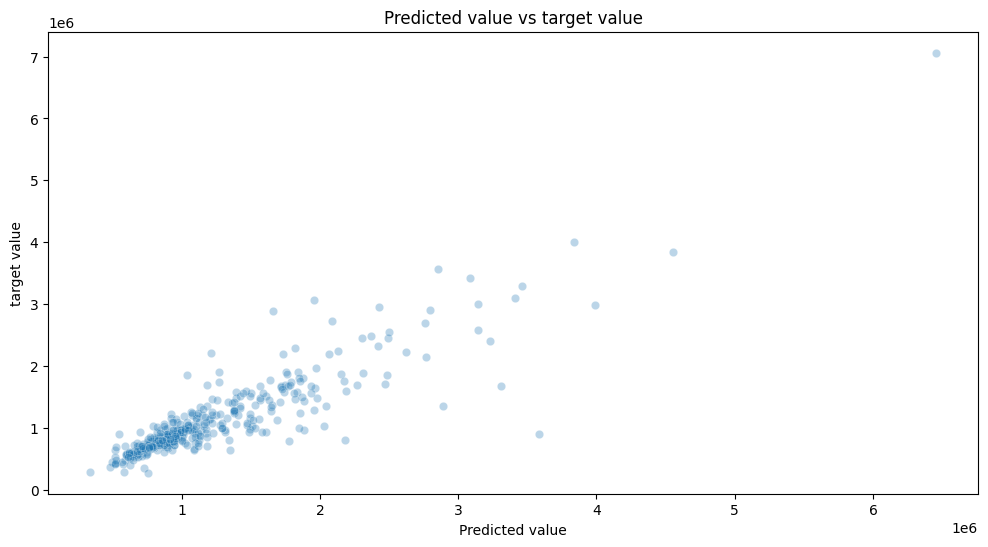

In [45]:
predict = [i[0] for i in  model2.predict(x_test)]

data = pd.DataFrame({"predict": predict , "true_value" : y_test.price})

plt.figure(figsize=(12,6))
plt.title("Predicted value vs target value")
plt.ylabel("target value")
plt.xlabel("Predicted value")
sns.scatterplot(data = data , x="predict", y= "true_value", alpha=0.30)

In [46]:
print("MAE: ", mean_absolute_error(predict , y_test))
print("MAPE: ", mean_absolute_percentage_error(predict , y_test))
print("RMSE: ", root_mean_squared_error(predict , y_test))

MAE:  189728.11892564403
MAPE:  0.14515582486390521
RMSE:  320830.6859570142
